<a href="https://colab.research.google.com/github/sudharshanpaul/Deep-Learning/blob/main/RNN/GoogleStockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recurrent Neural Network

### Part-1: Data Preprocessing

#### Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Importing the training set

In [5]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
training_set = dataset_train.iloc[:, 1:2].values

In [7]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

#### Feature Scaling

- As the LSTM is using Sigmoid activation function internally it is highly recommeded to use Normalization for feature scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

#### Creating a data structure with 60 timesteps and 1 output

- Creating a data structure specifyig what the RNN will need to remember when predicting. This is called number of timesteps.

- Here 60 timesteps means for predicting a result it'll take 60 datapoints before the time T, based on the trends it'll predict next output

In [10]:
X_train = []
y_train = []

In [11]:
for i in range(60, len(training_set_scaled)):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [13]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

#### Reshaping

- Here we have only 1 indicator i.e previous Stocks.., if we have other indicators we can add them in another dimension... Eg. If we take stocks of Apple they'll depend on Apple Stocks and Samsung stocks, so we can add them as another indicator

In [14]:
X_train.shape

(1198, 60)

In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
X_train.shape

(1198, 60, 1)

### Part-2 : Building a RNN

#### Importing the Keras libraries and packages

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### Initializing the RNN

In [19]:
rnn_regressor = Sequential()

#### Adding the first LSTM layer ans some Dropout regularization

In [20]:
rnn_regressor.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
rnn_regressor.add(Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Adding a second LSTM layer and some regularization

In [21]:
rnn_regressor.add(LSTM(units=50, return_sequences=True))
rnn_regressor.add(Dropout(0.2))

#### Adding a third LSTM layer and some regularization

In [22]:
rnn_regressor.add(LSTM(units=50, return_sequences=True))
rnn_regressor.add(Dropout(0.2))

#### Adding a fourth LSTM layer and some regularization

In [23]:
rnn_regressor.add(LSTM(units=50))
rnn_regressor.add(Dropout(0.2))

#### Adding the Output layer

In [24]:
rnn_regressor.add(Dense(units = 1))

#### Compiling the RNN

In [25]:
rnn_regressor.compile(optimizer = 'adam', loss='mean_squared_error')

#### Fitting the RNN to the Training set

In [26]:
rnn_regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - loss: 0.0780
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0068
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0054
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0054
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0061
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0053
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0048
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0050
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0043
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0042
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - loss: 0.0043
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0040
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0042
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0041
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/ste

### Part-3 Making the Predictions and Visualizing the results

#### Getting the real stock price of 2017

In [27]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

#### Getting the predicted stock proce of 2017

In [29]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [30]:
len(inputs)

80

In [32]:
X_test = []
for i in range(60, len(inputs)):
  X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))

In [33]:
predicted_stock_price = rnn_regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step


#### Visualizing the results

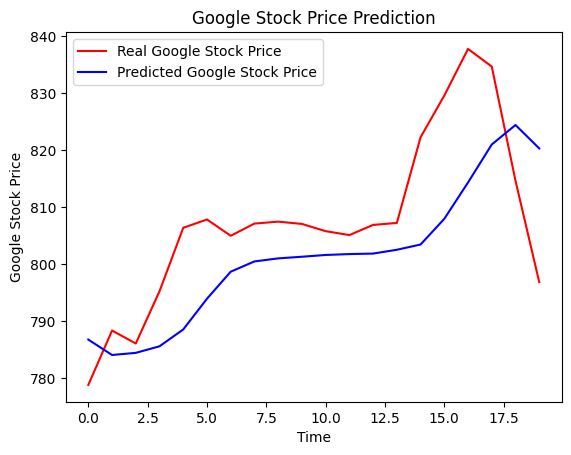

In [36]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.legend()
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
_=plt.show()